In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


In [11]:
th_k = [163, 165, 162, 155, 153, 153, 145, 134, 65.8, 67.9, 70.0]
th_k_t = [25, 100,200, 300, 380, 400, 500, 567, 614, 700, 800]


th_k_ts = np.array(th_k_t).reshape(-1, 1)
th_k_s = np.array(th_k).reshape(-1, 1)


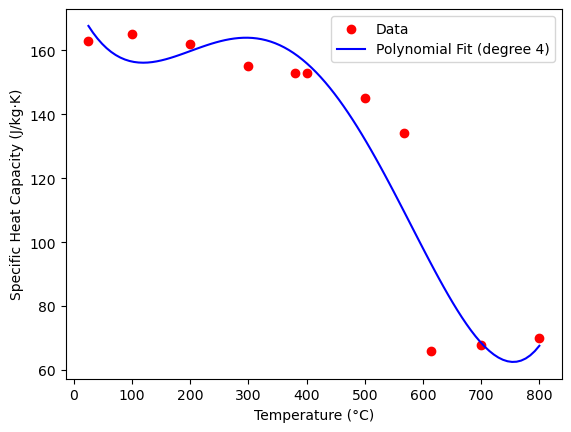

In [12]:
# Create a polynomial regression model (degree 3 in this example)
degree = 4

model_k = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model
model_k.fit(th_k_ts, th_k_s)

# Predict values


x_pred = np.linspace(25, 800, 100).reshape(-1, 1)
y_pred = model_k.predict(x_pred)

# Plot the results
plt.scatter(th_k_t, th_k, color='red', label='Data')
plt.plot(x_pred, y_pred, color='blue', label=f'Polynomial Fit (degree {degree})')
plt.xlabel('Temperature (°C)')
plt.ylabel('Specific Heat Capacity (J/kg·K)')
plt.legend()
plt.show()

In [13]:
from joblib import dump, load

dump(model_k, 'model_k.joblib')



['model_k.joblib']

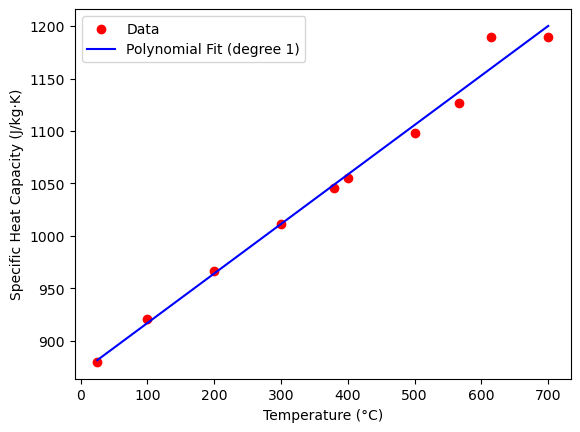

In [14]:
cp = [880, 921, 967, 1011, 1046, 1055, 1098, 1127, 1190, 1190]
cp_t = [25, 100, 200, 300, 380, 400, 500, 567, 614, 700]

# Create a polynomial regression model (degree 3 in this example)
degree = 1
model_cp = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Prepare data
cp_t = np.array(cp_t).reshape(-1, 1)  # Temperature (input)
cp = np.array(cp).reshape(-1, 1)      # Specific heat capacity (output)

# Fit the model
model_cp.fit(cp_t, cp)

# Predict values
x_pred = np.linspace(25, 700, 500).reshape(-1, 1)  # Temperature range for prediction
y_pred = model_cp.predict(x_pred)

# Plot the results
plt.scatter(cp_t, cp, color='red', label='Data')
plt.plot(x_pred, y_pred, color='blue', label=f'Polynomial Fit (degree {degree})')
plt.xlabel('Temperature (°C)')
plt.ylabel('Specific Heat Capacity (J/kg·K)')
plt.legend()
plt.show()

In [15]:
dump(model_cp, 'model_cp.joblib')

['model_cp.joblib']

In [16]:
def latent_heat(t):
    """
    Calculate the latent heat of fusion for a given temperature or temperatures
    based on Zhang paper Data. Handles scalar, list, or numpy array inputs.
    """
    # Convert input to a numpy array for vectorized operations
    t = np.array(t, dtype=float)

    # Initialize latent heat with default value (e.g., 0 for out-of-range values)
    lf = np.zeros_like(t)

    # Apply conditions for each range
    lf[(t >= 533.0) & (t < 563.6)] = 36.18
    lf[(t >= 563.6) & (t < 567.2)] = 170.36
    lf[(t >= 567.2) & (t < 588.2)] = 48.74
    lf[(t >= 588.2) & (t < 610.7)] = 91.20
    lf[(t >= 610.7) & (t < 613.2)] = 51.02

    # Return scalar if input was scalar, otherwise return array
    return lf.item() if lf.size == 1 else lf

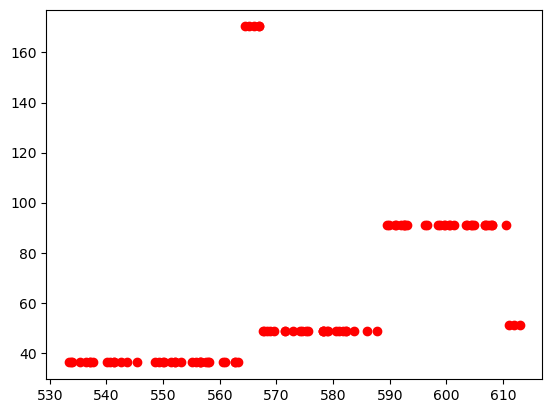

In [17]:
t_range = np.random.uniform(533.0, 613.2, 100)
lh_data = latent_heat(t_range)

degree_lh = 8
model = make_pipeline(PolynomialFeatures(degree_lh), LinearRegression())
model.fit(t_range.reshape(-1, 1), lh_data.reshape(-1, 1))
lh_pred = model.predict(t_range.reshape(-1, 1))

# Plot the results
plt.scatter(t_range, lh_data, color='red', label='Data')




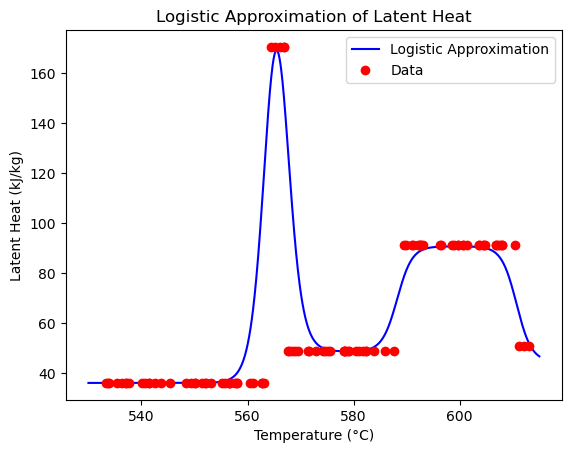

In [18]:
from scipy.special import expit  # Sigmoid function

def logistic_approximation(t, centers, heights, steepness):
    """
    Logistic approximation of the latent heat step function.
    t: Input temperature (scalar, list, or numpy array)
    centers: List of center points for each step
    heights: List of heights for each step
    steepness: Steepness of the transitions
    """
    t = np.array(t, dtype=float)
    result = np.full_like(t, 36.18)  # Initialize result array with zeros
    for center, height in zip(centers, heights):
        result += height * expit(steepness * (t - center))
    return result

# Parameters for logistic approximation
centers = [563.6, 563.6, 567.2, 588.2, 610.7]  # Midpoints of each range
heights = [36.18, 194.36, -218, 42, -46]   # Heights of each step
steepness = 0.71  # Controls the sharpness of the transitions

# Generate data
t = np.linspace(530, 615, 1000)
latent_heat_logistic = logistic_approximation(t, centers, heights, steepness)

# Plot
plt.plot(t, latent_heat_logistic, label="Logistic Approximation", color="blue")
plt.plot(t_range, lh_data, 'o', label="Data", color="red")
plt.xlabel("Temperature (°C)")
plt.ylabel("Latent Heat (kJ/kg)")
plt.title("Logistic Approximation of Latent Heat")
plt.legend()
plt.show()